# Effects of Borrowers' Characteristics on Loan Amount and Interest Rate
## by Chun-Feng Pai

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


## Investigation Overview

I would like to know what borrowers' characteristics have impacts on the loan amount and interest rates. The main focus of my investigation will be on credit grads, prosper scores and income. 

In [3]:
# importa data for analysis 
loans=pd.read_csv('prosperLoanData.csv')

In [5]:
# convert CreditGrade, EmploymentStatus, and IncomeRange into ordered categorical datatype.
ordinal_var_dict = {'CreditGrade': ['NC','HR','E','D','C','B','A','AA'],
                    'EmploymentStatus': ['Not available', 'Other', 'Not employed','Retired', 'Self-employed', 'Part-time', 'Full-time', 'Employed'],
                    'IncomeRange':['Not displayed','Not employed','0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

### The distribution of loan status

Most loans in this dataset are either complete or current, meaning the our analysis is still relevant. In case the load is already defaulted, our analysis could be less powerful

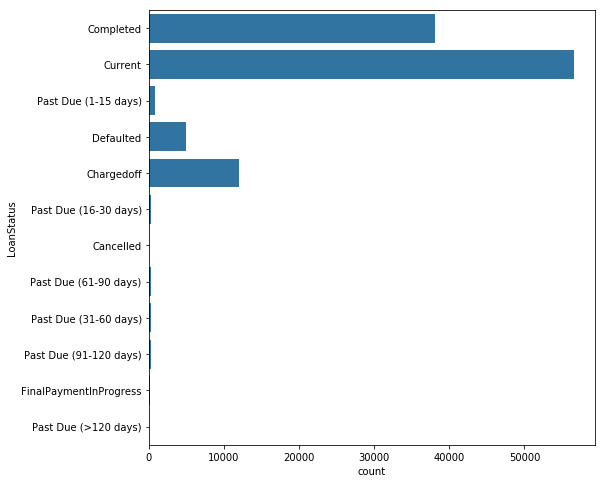

In [8]:
# first check the loan status to ensure the analysis is relevant.
plt.figure(figsize = [8,8])
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='LoanStatus', color=base_color)

### The distribution of loan amount

Most loans in this dataset have amount lower than 10000 dollors, meaning this data have more small loans.

Text(0.5,0,'Loan amount (dollars)')

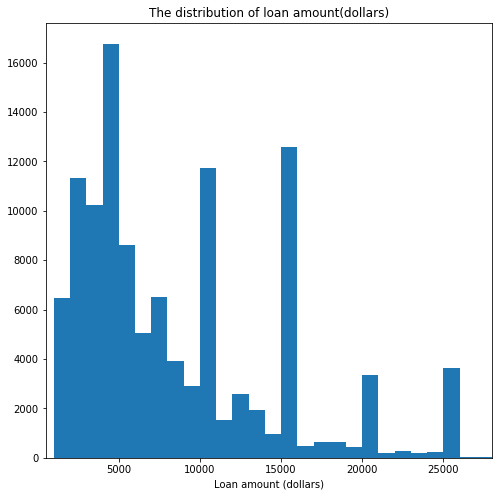

In [12]:
# check the loan amount in the dataset.
plt.figure(figsize = [8,8])
bins=np.arange(0,loans.LoanOriginalAmount.max()+1000,1000)
plt.hist(data=loans, x='LoanOriginalAmount', color=base_color, bins=bins)
plt.xlim(500,28000)
plt.title('The distribution of loan amount(dollars)')
plt.xlabel('Loan amount (dollars)')

### The distribution of interest rates

The interest rates for most borrowers lie between 1% and 2%.

Text(0.5,0,'Interest rates')

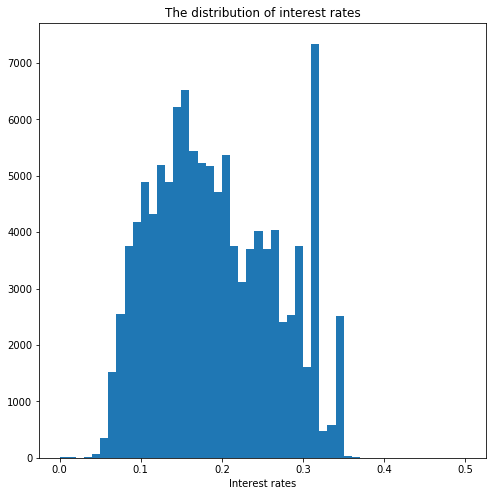

In [14]:
# check the cost of borrowing in this dataset
plt.figure(figsize = [8,8])
bins=np.arange(0,loans.BorrowerRate.max()+0.01,0.01)
plt.hist(data=loans, x='BorrowerRate', color=base_color, bins=bins)
plt.title('The distribution of interest rates')
plt.xlabel('Interest rates')

### The relationship between loan amount and interest rates

There seems to be a negative correlation between these two variables. This relationship contradicts my expectation because the higher amount of loans entails higher default risk and thus higher borrower costs.

Text(0,0.5,'Interest rates')

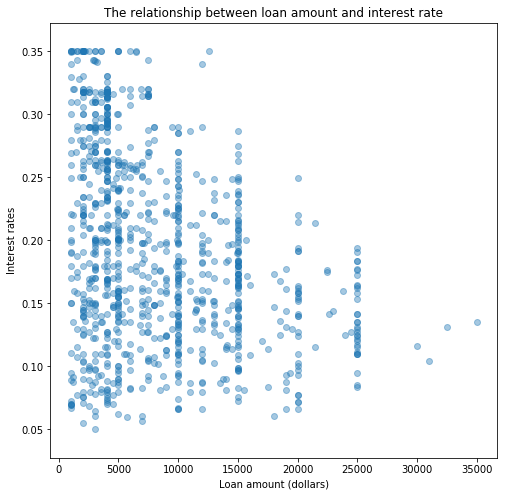

In [16]:
# use sample data to observe the relationship between loan amount and borrower rates.
samples = np.random.choice(loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]
plt.figure(figsize = [8,8])
plt.scatter(data=loans_samp, x='LoanOriginalAmount', y='BorrowerRate', alpha=0.4)
plt.title('The relationship between loan amount and interest rate')
plt.xlabel('Loan amount (dollars)')
plt.ylabel('Interest rates')

### The relationship between credit grade and interest rates

This chart shows a decreasing borrowing cost when the credit grade is higher.

Text(0,0.5,'Interest rate')

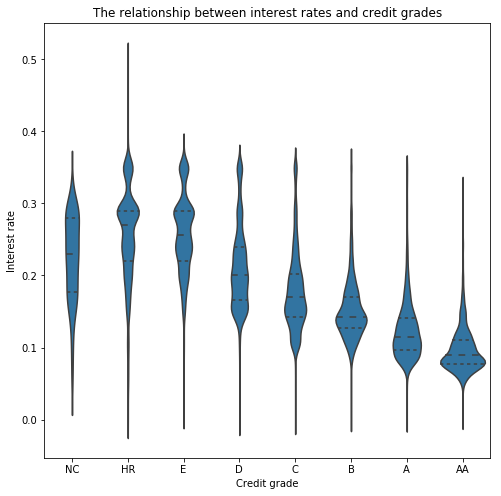

In [17]:
# use the violin chart to analyse the relationship between credit grade and borrower rates.
plt.figure(figsize = [8,8])
sb.violinplot(data=loans, x='CreditGrade',y='BorrowerRate', color=base_color, inner='quartile')
plt.title('The relationship between interest rates and credit grades')
plt.xlabel('Credit grade')
plt.ylabel('Interest rate')

### The relationship between loan amount and credit grades

The boxplot demonstrates increasing loan amount when the grade of credit is better. A second finding from this plot includes also the width of box. When you have lower credit grade, the distrubution of loan amount of loan is narrow with many outliers. However, borrowers who have good credit grades can borrow more money, leading to a wider boxplot.

Text(0,0.5,'Loan amount (dollars)')

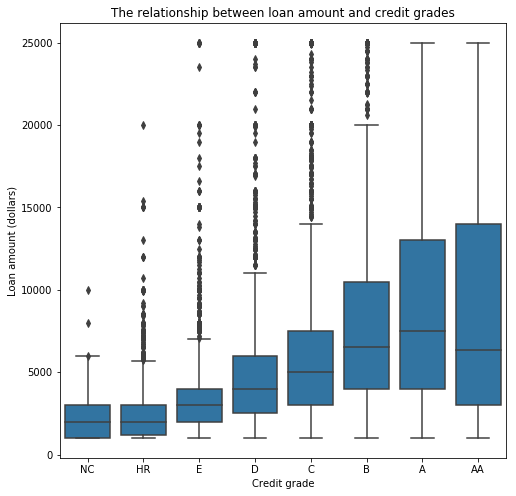

In [19]:
# use the boxplot to analyse the relationship between credit grade and loan amount.
plt.figure(figsize = [8,8])
sb.boxplot(data=loans, x='CreditGrade',y='LoanOriginalAmount', color=base_color)
plt.title('The relationship between loan amount and credit grades')
plt.xlabel('Credit grade')
plt.ylabel('Loan amount (dollars)')

### The relationship betweem borrowing cost and income

This chart shows lower rates given the income is higher.

Text(0,0.5,'Interest rates')

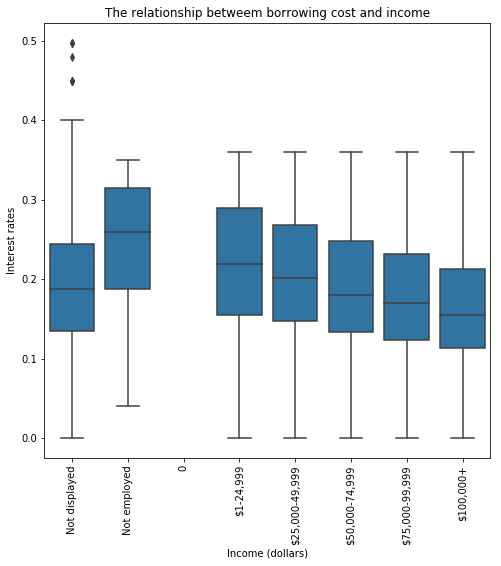

In [20]:
# check the relationship betweem borrowing cost and income.
plt.figure(figsize = [8,8])
sb.boxplot(data=loans, x='IncomeRange',y='BorrowerRate', color=base_color)
plt.xticks(Rotation=90)
plt.title('The relationship betweem borrowing cost and income')
plt.xlabel('Income (dollars)')
plt.ylabel('Interest rates')

### The relaitionship among credit grades, loan amount and interest rates.

The positive relationship between loan amount and interest rates become more apparent when the credit grade is better.

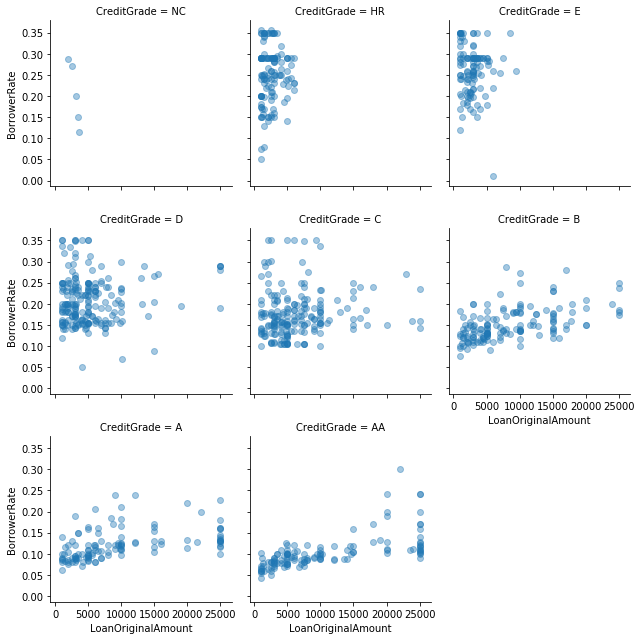

In [101]:
# investigate the relaitionship among credit grades, loan amount and interest rates.
samples = np.random.choice(loans.shape[0], 4000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.FacetGrid(data = loans_samp, col = 'CreditGrade', col_wrap = 3, size = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.4)

### The relationship among prosper score, loan amount and income range.

When the income is higher, the positive correlation between loan amount and prosper socres get stronger.

Text(0,0.5,'Loan amount (dollars)')

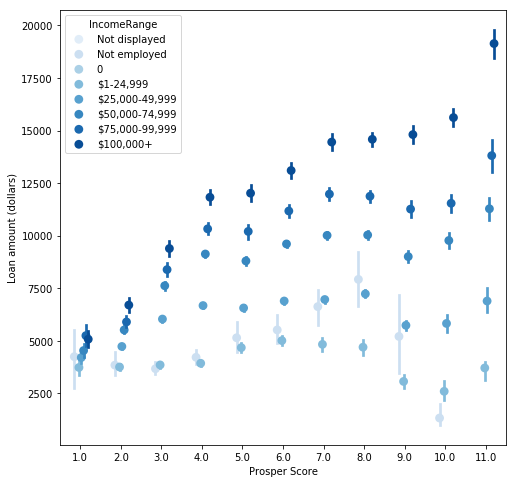

In [23]:
# check the relationship among prosper score, loan amount and income range.
plt.figure(figsize = [8,8])
sb.pointplot(data = loans, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange', palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xlabel('Prosper Score')
plt.ylabel('Loan amount (dollars)')

### The relationship among prosper score, interest rates and income range.

When the income is higher, the negative correlation between loan amount and prosper socres get stronger.

Text(0,0.5,'Interest rate')

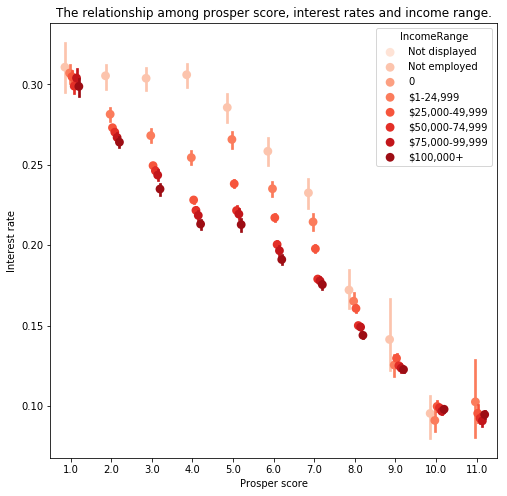

In [25]:
# check the relationship among prosper score, interest rates and income range.
plt.figure(figsize = [8,8])
sb.pointplot(data = loans, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange', palette = 'Reds', linestyles = '', dodge = 0.4)
plt.title('The relationship among prosper score, interest rates and income range.')
plt.xlabel('Prosper score')
plt.ylabel('Interest rate')

## Conclusion

Based on my analysis above, we can find out the positive relationship between income, prosper scores, credit grades, and interest rates. The same positive correlation also applies to the loan amount. Therefore, it is very important for borrowers to have good proser scores and income if they want to apply for big loans with good interest rates.